In [1]:
# Almost everything is from the https://github.com/HariAcidReign/DS-and-ML-Resources/blob/master/CNN%20using%20TF%20and%20Keras.ipynb repo

import numpy as np
import tensorflow as tf
data = np.load('data.npy')
target = np.load('target.npy')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
model = Sequential()
# First we do convolution,then activation and then do maxPooling and the cycle continues
# This is the first hidden layer
model.add(Conv2D(200, (3,3), input_shape=data.shape[1:])) # The conv layer is 200 units
# 3,3 denotes the window side for Sliding window classifier (3x3 box)
model.add(Activation("relu")) # Relu is better than sigmoid function (Refer NG notes)
model.add(MaxPooling2D(pool_size=(2,2)))

#This is the 2nd hidden layer...obvio no need input shape
model.add(Conv2D(100, (3,3))) # 1oo units conv layer
model.add(Activation("relu")) # Relu is better than sigmoid function (Refer NG notes)
model.add(MaxPooling2D(pool_size=(2,2)))

# This is the final dense layer. Have to flatten from 2D convolution to 1D before entering dense state
model.add(Flatten())
model.add(Dropout(0.5)) # Added to reduce overfitting
model.add(Dense(50, activation='relu'))
# Output layer
model.add(Dense(2, activation='softmax'))
# Try categorical_crossentropy but here only 2 cases(with and without) so no need.
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy']) 

In [3]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size = 0.1)

#checkpoint = ModelCheckpoint('model-{epoch:03d}.model', monitor='val_loss', verbose=0,save_best_only=True, mode='auto')
# If val loss inc. after an epoch, it wont be saved
#history = model.fit(train_data, train_target, epochs=20, callbacks=[checkpoint], validation_split=0.2)
history = model.fit(train_data, train_target, epochs = 15, validation_split=0.2) 

Train on 990 samples, validate on 248 samples
Epoch 1/15
990/990 [==============================] - 5s 5ms/sample - loss: 0.7130 - accuracy: 0.5495 - val_loss: 0.6115 - val_accuracy: 0.5968
Epoch 2/15
990/990 [==============================] - 2s 2ms/sample - loss: 0.5471 - accuracy: 0.7091 - val_loss: 0.3716 - val_accuracy: 0.8871
Epoch 3/15
990/990 [==============================] - 2s 2ms/sample - loss: 0.3720 - accuracy: 0.8293 - val_loss: 0.2616 - val_accuracy: 0.9315
Epoch 4/15
990/990 [==============================] - 2s 2ms/sample - loss: 0.2514 - accuracy: 0.9101 - val_loss: 0.4311 - val_accuracy: 0.7863
Epoch 5/15
990/990 [==============================] - 2s 2ms/sample - loss: 0.2114 - accuracy: 0.9202 - val_loss: 0.1277 - val_accuracy: 0.9718
Epoch 6/15
990/990 [==============================] - 2s 2ms/sample - loss: 0.1595 - accuracy: 0.9455 - val_loss: 0.1306 - val_accuracy: 0.9677
Epoch 7/15
990/990 [==============================] - 2s 2ms/sample - loss: 0.1088 - accur

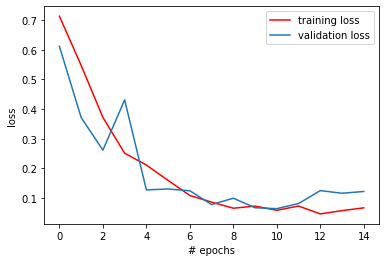

In [4]:
# Min val loss given by epoch 9. Using 9th model in maskDetection module
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

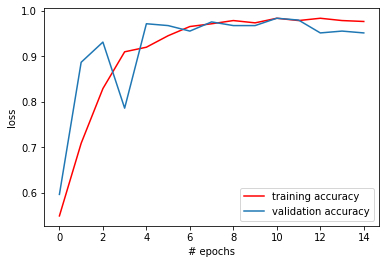

In [5]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [6]:
print(model.evaluate(test_data, test_target))

138/138 [==============================] - 0s 1ms/sample - loss: 0.1332 - accuracy: 0.9493
[0.13317853363527768, 0.9492754]


In [7]:
model.save("modelMaskFinal.h5")
print("Model Saved!")

Model Saved!
